<a href="https://colab.research.google.com/github/juliojesus15/UMAP-projection/blob/main/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

In [ ]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **UMAP - Fit and Tranform**



In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
#penguins.head()

In [53]:
penguins = penguins.dropna()
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler

penguin_data = penguins[ [ "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", ] ].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [62]:
umap_model = umap.UMAP()

In [63]:
embedding = umap_model.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')


# **Generating UMAP with New Data**

In [85]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [86]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(14,10)})

In [87]:
digits = load_digits()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=42)

In [89]:
svc = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

In [90]:
svc.score(X_test, y_test), knn.score(X_test, y_test)

(0.9911111111111112, 0.9844444444444445)

In [102]:
umap_model_1 = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)

umap_model_2 = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)

In [98]:
#params = umap_model.get_params()
#print(params["n_neighbors"])
embedding = umap_model.embedding_
embedding

array([[11.979509 , -7.688963 ],
       [ 5.3532887,  1.7320402],
       [12.036138 , -7.037827 ],
       ...,
       [ 7.671466 ,  9.152052 ],
       [ 3.6447952,  4.556578 ],
       [ 8.267393 , 11.395716 ]], dtype=float32)

In [ ]:
#plt.scatter(umap_model.embedding_[:, 0], umap_model.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
#plt.title('Embedding of the training set by UMAP', fontsize=16);

In [94]:
svc = SVC().fit(umap_model.embedding_, y_train)
knn = KNeighborsClassifier().fit(umap_model.embedding_, y_train)

In [103]:
test_embedding = umap_model_1.transform(X_test)


In [104]:
umap_model_2.embedding_ = umap_model_1.embedding_

test_embedding_2 = umap_model_2.transform(X_test)

[ 4.73177004e+00,  2.46851373e+00],
[ 1.91173019e+01,  3.47619963e+00],
[ 7.86290264e+00,  1.09972172e+01],
[-8.19267273e+00,  3.35794115e+00],
[ 7.09956217e+00,  1.42389803e+01],
[ 1.32900066e+01,  1.82322578e+01],
[ 2.65943050e-01, -8.95168245e-01],
[ 8.13252068e+00,  1.00992136e+01],
[ 5.73924875e+00,  2.07148552e+00],

In [108]:
umap_model = umap.UMAP(n_neighbors=5, random_state=42)


In [ ]:
test_embedding_2

In [ ]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24);

# **UMAP With Random data**

In [64]:
np.random.seed(42)
data = np.random.rand(800, 4)

In [65]:
fit = umap.UMAP()
u = fit.fit_transform(data)

In [ ]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');

# **Test parameters**

In [ ]:
# metric: Euclidean - Manhattan - Minkowski -Chebyshev

In [69]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title('UMAP', fontsize=12)

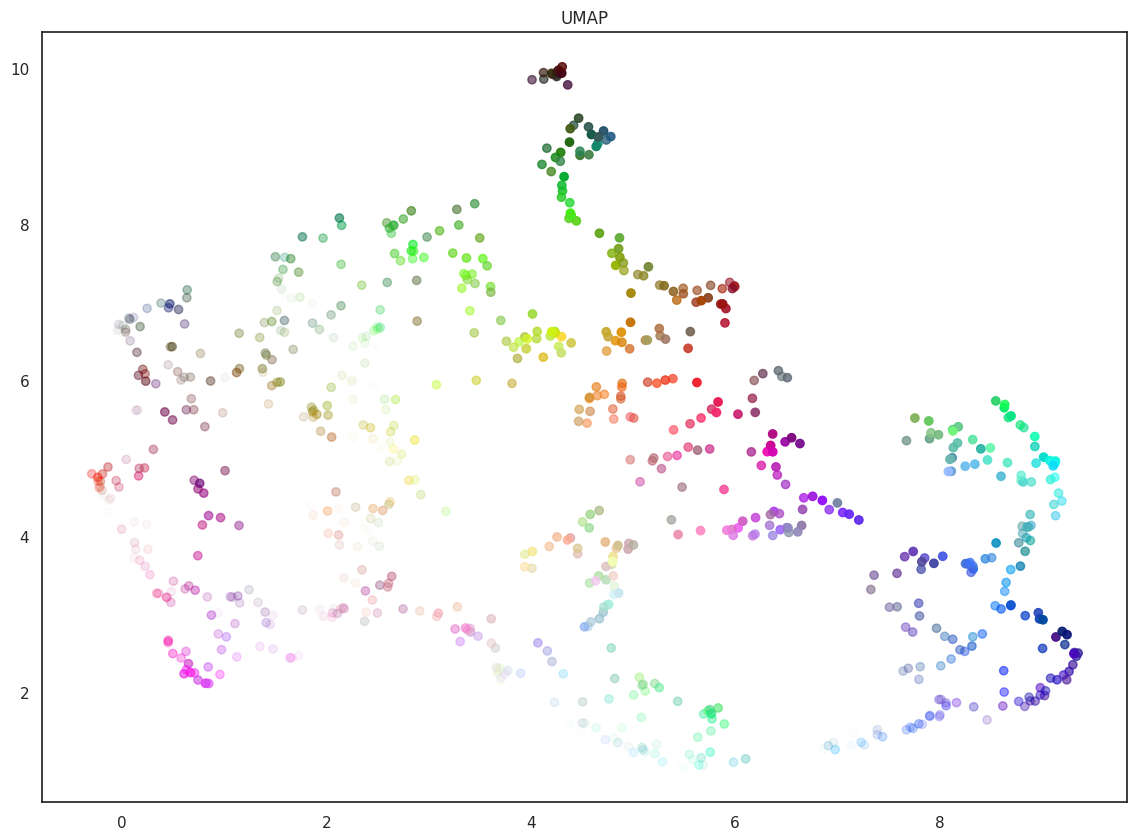

In [70]:
draw_umap()